The objective of this model is to clasificate if a pacient has or not liver cancer using K-NN technique for clasification, in the output we'll have two clases (has liver cancer, not have liver cancer)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    balanced_accuracy_score,
    roc_auc_score
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler, MinMaxScaler , RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Abrimos y exploramos nuestro dataset

In [2]:
liver_data = pd.read_csv("synthetic_liver_cancer_dataset.csv")
liver_data

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,20.1,Regular,Never,0,0,68.2,6.73,1,0,Moderate,0,0
4996,80,Male,16.9,Never,Never,1,0,80.2,44.66,0,0,Low,0,0
4997,51,Female,23.1,Occasional,Never,0,0,65.7,7.64,0,1,Low,0,0
4998,76,Female,26.4,Never,Never,0,1,26.4,6.15,0,0,Low,0,0


In [3]:
liver_data.dtypes

age                          int64
gender                      object
bmi                        float64
alcohol_consumption         object
smoking_status              object
hepatitis_b                  int64
hepatitis_c                  int64
liver_function_score       float64
alpha_fetoprotein_level    float64
cirrhosis_history            int64
family_history_cancer        int64
physical_activity_level     object
diabetes                     int64
liver_cancer                 int64
dtype: object

Distribucion de clases

<Axes: xlabel='liver_cancer', ylabel='count'>

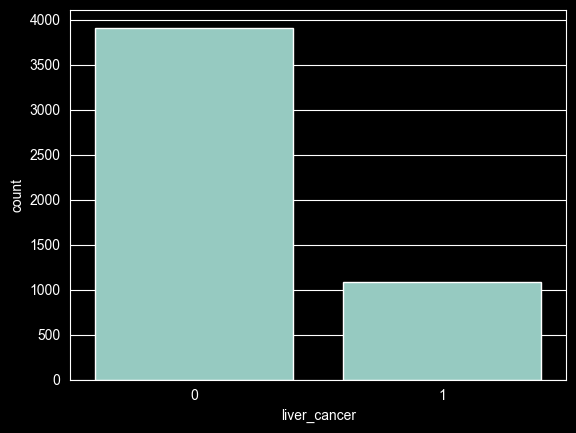

In [4]:
sns.countplot(x='liver_cancer', data=liver_data)

In [5]:
#con pandas
le = LabelEncoder()
enc = OneHotEncoder()
# para las que solo tienen 2 valores
#liver_data['gender'] = le.fit_transform(liver_data['gender'])# Male=1, Female=0

#para las one-hot que son: alcohol_consumption, smoking_status, physical_activity_level
#liver_data = pd.get_dummies(liver_data, columns=['alcohol_consumption'], drop_first=True)
#liver_data = pd.get_dummies(liver_data, columns=['smoking_status'], drop_first=True)
#liver_data = pd.get_dummies(liver_data, columns=['physical_activity_level'], drop_first=True)



In [6]:
# Con scickit learn

# Variable binaria
binary_cols = ['gender']

# Variables categóricas (más de dos valores)
categorical_cols = [
    'alcohol_consumption',
    'smoking_status',
    'physical_activity_level'
]

# Variables numéricas (ejemplo: ajusta a tu dataset)
numeric_cols = [
    'age',
    'bmi',
    'liver_function_score',
    'alpha_fetoprotein_level'
]

# Procesado

preprocesor = ColumnTransformer(
    transformers=[
        ('binary', OneHotEncoder(drop='if_binary'), binary_cols),

        ('cat', OneHotEncoder(drop='first'), categorical_cols),

        ('num', StandardScaler(), numeric_cols)
    ]
)

pipeline = ImbPipeline([
        ('preprocesing', preprocesor),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('knn', KNeighborsClassifier(
            n_neighbors=10,
            weights='uniform',
            metric = 'manhattan',
            algorithm='auto'
        ))]
)

# Entrenamiento

X = liver_data.drop(columns='liver_cancer')
y = liver_data['liver_cancer']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

pipeline.fit(X_train, y_train)

,steps,"[('preprocesing', ...), ('smoteenn', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binary', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


=== Métricas generales ===
Accuracy: 0.723
Balanced Accuracy: 0.729

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       782
           1       0.42      0.74      0.54       218

    accuracy                           0.72      1000
   macro avg       0.67      0.73      0.67      1000
weighted avg       0.80      0.72      0.74      1000


=== Matriz de Confusión ===
[[562 220]
 [ 57 161]]

ROC AUC: 0.795


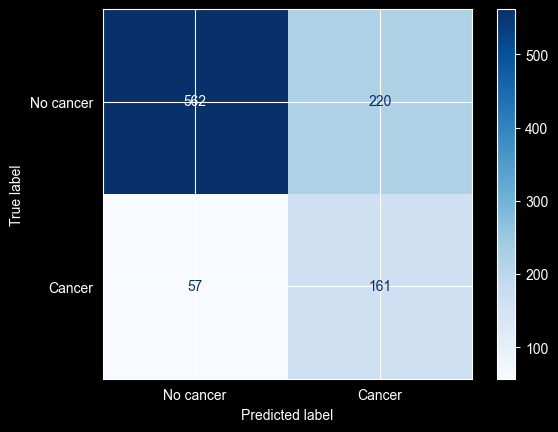

In [7]:
# 1️⃣ Predicciones sobre test
y_pred = pipeline.predict(X_test)

# 2️⃣ Probabilidades (para ROC AUC)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# =========================
# 3️⃣ Métricas básicas
# =========================
accuracy = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

print("=== Métricas generales ===")
print(f"Accuracy: {accuracy:.3f}")
print(f"Balanced Accuracy: {balanced_acc:.3f}")

# =========================
# 4️⃣ Report de clasificación completo
# =========================
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# =========================
# 5️⃣ Matriz de confusión
# =========================
print("\n=== Matriz de Confusión ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

ConfusionMatrixDisplay.from_estimator(
    pipeline,
    X_test,
    y_test,
    display_labels=['No cancer', 'Cancer'],
    cmap='Blues'
)

# =========================
# 6️⃣ ROC AUC
# =========================
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC: {roc_auc:.3f}")